In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
dataframe = pd.read_csv("heart.csv")
dataframe.describe()
# dataframe.iloc[0, "age"]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [41]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


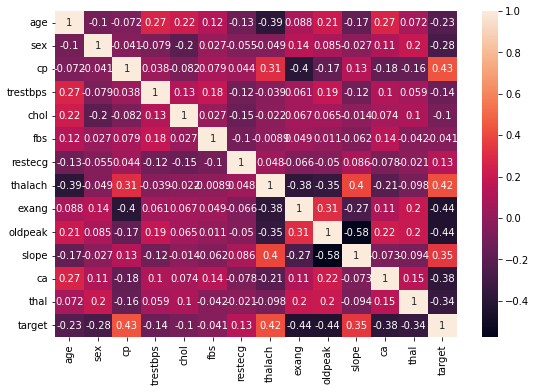

In [5]:
import seaborn as sns
corrmat = dataframe.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(9, 6))
g = sns.heatmap(dataframe[top_corr_features].corr(), annot=True, fmt=".2g")

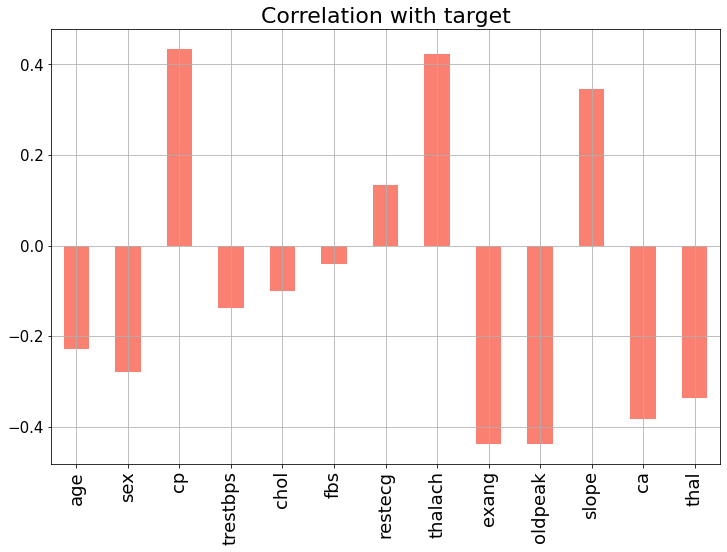

In [6]:
a = dataframe.drop('target', axis=1)
a.corrwith(dataframe.target).plot(kind='bar', grid=True, figsize=(12, 8), color=['salmon'])

plt.title("Correlation with target", size=22)
plt.xticks(size=18)
plt.yticks(size=15)
plt.show()

In [7]:
results_test = {}
results_train = {}
list_algos=[]


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

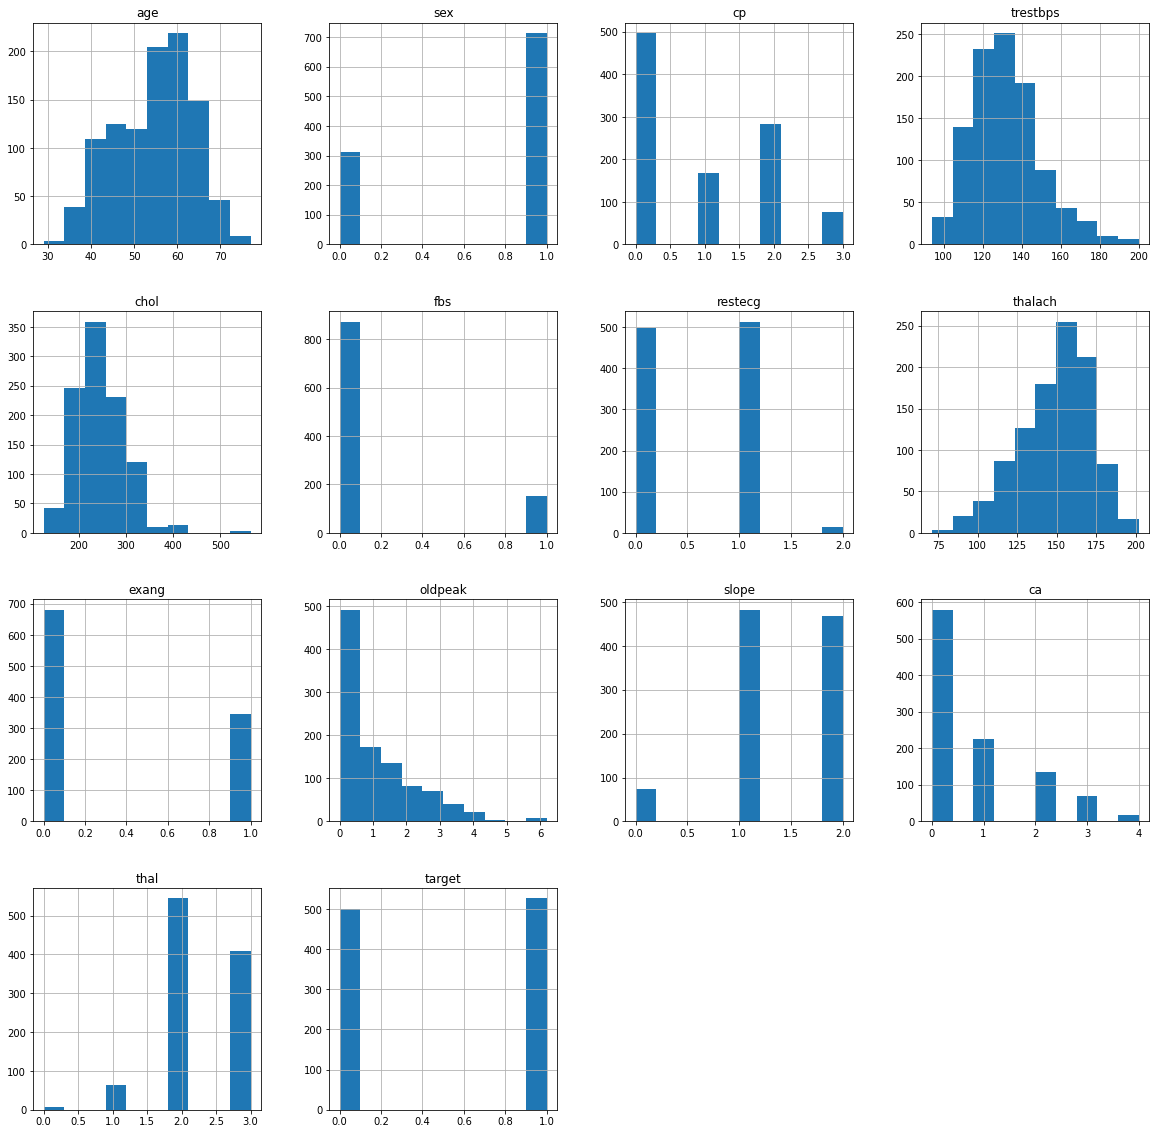

In [8]:
dataframe.hist(figsize=(20, 20))

<AxesSubplot:xlabel='target', ylabel='count'>

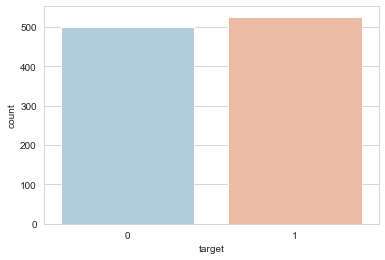

In [9]:
import seaborn as sns
sns.set_style("whitegrid")
sns.countplot(x = "target", data=dataframe, palette="RdBu_r")

In [10]:
dataset = pd.get_dummies(dataframe, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
# dataset = pd.get_dummies(dataframe, columns = columns)
# dataset.columns
# dataframe.columns
# len(dataset.columns)

In [11]:
def get_encoded(age, trestbps, chol, fbs, thalach, oldpeak, sex, cp, restecg, exang, slope, ca, thal):
    args = []
    args.append(age)
    args.append(trestbps)
    args.append(chol)
    args.append(thalach)
    args.append(oldpeak)
    if sex == 0:
        args.append(1)
        args.append(0)
    elif sex == 1:
        args.append(0)
        args.append(1)
    if cp == 0:
        args.append(1)
        args.append(0)
        args.append(0)
        args.append(0)
    elif cp == 1:
        args.append(0)
        args.append(1)
        args.append(0)
        args.append(0)
    elif cp == 2:
        args.append(0)
        args.append(0)
        args.append(1)
        args.append(0)
    elif cp == 3:
        args.append(0)
        args.append(0)
        args.append(0)
        args.append(1)
    if restecg == 0:
        args.append(1)
        args.append(0)
        args.append(0)
    elif restecg == 1:
        args.append(0)
        args.append(1)
        args.append(0)
    elif restecg == 2:
        args.append(0)
        args.append(0)
        args.append(1)
    
    if exang == 0:
        args.append(1)
        args.append(0)
    elif exang == 1:
        args.append(0)
        args.append(1)
    
    if slope == 0:
        args.append(1)
        args.append(0)
        args.append(0)
    elif slope == 1:
        args.append(0)
        args.append(1)
        args.append(0)
    elif slope == 2:
        args.append(0)
        args.append(0)
        args.append(1)

    # ca 5
    if ca == 0:
        args.append(1)
        args.append(0)
        args.append(0)
        args.append(0)
        args.append(0)
    elif ca == 1:
        args.append(0)
        args.append(1)
        args.append(0)
        args.append(0)
        args.append(0)
    elif ca == 2:
        args.append(0)
        args.append(0)
        args.append(1)
        args.append(0)
        args.append(0)
    elif ca == 3:
        args.append(0)
        args.append(0)
        args.append(0)
        args.append(1)
        args.append(0)
    elif ca == 4:
        args.append(0)
        args.append(0)
        args.append(0)
        args.append(0)
        args.append(1)
    
    # thal 4
    if thal == 0:
        args.append(1)
        args.append(0)
        args.append(0)
        args.append(0)
    elif thal == 1:
        args.append(0)
        args.append(1)
        args.append(0)
        args.append(0)
    elif thal == 2:
        args.append(0)
        args.append(0)
        args.append(1)
        args.append(0)
    elif thal == 3:
        args.append(0)
        args.append(0)
        args.append(0)
        args.append(1)

    # fbs 2
    if fbs == 0:
        args.append(1)
        args.append(0)
    elif fbs == 1:
        args.append(0)
        args.append(1)
    return args

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [13]:
dataset.info

<bound method DataFrame.info of            age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0    -0.268437 -0.377636 -0.659332  0.821321 -0.060888       0      0      1   
1    -0.158157  0.479107 -0.833861  0.255968  1.727137       0      0      1   
2     1.716595  0.764688 -1.396233 -1.048692  1.301417       0      0      1   
3     0.724079  0.936037 -0.833861  0.516900 -0.912329       0      0      1   
4     0.834359  0.364875  0.930822 -1.874977  0.705408       0      1      0   
...        ...       ...       ...       ...       ...     ...    ...    ...   
1020  0.503520  0.479107 -0.484803  0.647366 -0.912329       1      0      1   
1021  0.613800 -0.377636  0.232705 -0.352873  1.471705       0      0      1   
1022 -0.819834 -1.234378  0.562371 -1.353113 -0.060888       0      0      1   
1023 -0.488996 -1.234378  0.155137  0.429923 -0.912329       1      1      0   
1024 -0.047877 -0.663216 -1.124743 -1.570556  0.279688       0      0      1   

      c

In [14]:
dataset.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [15]:
def get_accuracy(algo_name,X_train,y_train,X_test,y_test,atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        return acc_train, acc_val
    else:
        return Y_pred

In [16]:
Y = dataset['target']
X = dataset.drop(['target'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=700, stratify=Y, random_state=2)

In [17]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,Y,cv=10)
    knn_scores.append(score.mean())


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

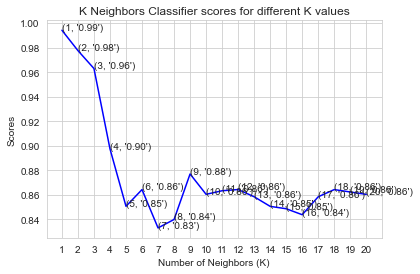

In [55]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, '{:.2f}'.format(knn_scores[i-1])))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [18]:
# knn_classifier = KNeighborsClassifier(n_neighbors = 100)
# score=cross_val_score(knn_classifier,X,Y,cv=10)
# acc_train, acc_test = get_accuracy(knn_classifier, X_train, Y_train, X_test, Y_test)
# print("Accuracy Training", acc_train)
# print("Accuracy Testing", acc_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


logistic_regression = LogisticRegression(random_state=0)
acc_train, acc_test = get_accuracy(logistic_regression, X_train, Y_train, X_test, Y_test)
print("Accuracy Training", acc_train)
print("Accuracy Testing", acc_test)

Accuracy Training 88.31
Accuracy Testing 85.14


In [21]:
randomforest_classifier= RandomForestClassifier(n_estimators=100, random_state=0)
acc_train, acc_test = get_accuracy(randomforest_classifier, X_train, Y_train, X_test, Y_test)
print("Accuracy Training", acc_train)
print("Accuracy Testing", acc_test)

Accuracy Training 100.0
Accuracy Testing 94.29


In [22]:
decision_tree = DecisionTreeClassifier(random_state=0)
acc_train, acc_test = get_accuracy(decision_tree, X_train, Y_train, X_test, Y_test)
print("Accuracy Training", acc_train)
print("Accuracy Testing", acc_test)

Accuracy Training 100.0
Accuracy Testing 92.14


In [23]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', probability=True)
acc_train, acc_test = get_accuracy(svm,X_train,Y_train,X_test,Y_test,'rbf')

print("Accuracy Training", acc_train)
print("Accuracy Testing", acc_test)

Accuracy Training 94.77
Accuracy Testing 88.71


In [24]:
df_test =pd.DataFrame(list(results_test.items()),
                      columns=['algo_name','acc_test'])
df_train =pd.DataFrame(list(results_train.items()),
                      columns=['algo_name','acc_train'])
df_results = df_test.join(df_train.set_index('algo_name'), on='algo_name')
df_results.sort_values('acc_test',ascending=False)


,algo_name,acc_test,acc_train
1,RandomForestClassifier_,94.29,100.00
2,DecisionTreeClassifier_,92.14,100.00
3,SVC_rbf,88.71,94.77
0,LogisticRegression_,85.14,88.31


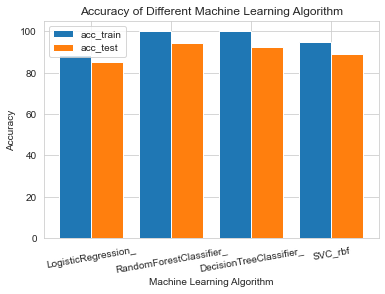

                 algo_name  acc_test  acc_train
0      LogisticRegression_     85.14      88.31
1  RandomForestClassifier_     94.29     100.00
2  DecisionTreeClassifier_     92.14     100.00
3                  SVC_rbf     88.71      94.77


In [25]:
algo_names = []
for i in df_results["algo_name"]:
    algo_names.append(i)
    
acc_test_temp = []
for i in df_results["acc_test"]:
    acc_test_temp.append(float(i))
# print(acc_test_temp)
acc_train_temp = []
for i in df_results["acc_train"]:
    acc_train_temp.append(float(i))
    
import numpy as np 
import matplotlib.pyplot as plt 

X_axis = np.arange(len(algo_names))

plt.bar(X_axis - 0.2, acc_train_temp, 0.4, label = 'acc_train')
plt.bar(X_axis + 0.2, acc_test_temp, 0.4, label = 'acc_test')
  
plt.rcParams["figure.figsize"] = (12,10)

plt.xticks(X_axis, algo_names, rotation=10)
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Machine Learning Algorithm")
plt.legend()
plt.show()

print(df_results)


In [26]:
# age=63
# sex=1
# cp=3
# trestbps=145
# chol=233
# fbs=1
# restecg=150
# thalach=0
# exang=2.3
# oldpeak=0
# slope=0
# ca=1
# thal=1
# target=1
# age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
# 63, 1,  3, 145,     233, 1,  0,      150,    0,    2.3,    0,    0, 1,   1

# age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
# 52,1,0,125,212,0,1,168,0,1,2,2,3,0
# 53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
# 70,1,0,145,174,0,1,125,1,2.6,0,0,3,0

Predicting From User Inputs

In [28]:
from pickle4 import pickle
# from sklearn.externals import joblib
import joblib
with open("model", "wb") as f:
    pickle.dump(decision_tree, f)
mul_reg = open('svm_model_new', 'rb')
ml_model = joblib.load(mul_reg)
# print(X_test)
count = 0
for i in range(len(dataframe)):
    age = float(dataframe.loc[i, 'age'])
    sex = float(dataframe.loc[i, 'sex'])
    cp = float(dataframe.loc[i, 'cp'])
    trestbps = float(dataframe.loc[i, 'trestbps'])
    chol = float(dataframe.loc[i, 'chol'])
    fbs= float(dataframe.loc[i, 'fbs'])
    restecg = float(dataframe.loc[i, 'restecg'])
    thalach = float(dataframe.loc[i, 'thalach'])
    exang = float(dataframe.loc[i, 'exang'])
    oldpeak = float(dataframe.loc[i, 'oldpeak'])
    slope = float(dataframe.loc[i, 'slope'])
    ca = float(dataframe.loc[i, 'ca'])
    thal = float(dataframe.loc[i, 'thal'])

    # pred_args = [age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]
    pred_args = [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
    model_prediction = ml_model.predict([pred_args])
    if model_prediction == dataframe.loc[i, "target"]:
        print(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, model_prediction)
        #     63.0 0.0  2.0 135.0     252.0 0.0  0.0      172.0    0.0    0.0      2.0    0.0  2.0 [1]
        #     58.0 1.0 2.0 140.0 211.0 1.0 0.0 165.0 0.0 0.0 2.0 0.0 2.0
        count += 1
    #         58.0 1.0  2.0 140.0     211.0 1.0  0.0      165.0    0.0    0.0      2.0    0.0 2.0   [1]
    #         70.0 1.0  0.0 145.0     174.0 0.0  1.0      125.0    1.0    2.6      0.0    0.0 3.0 [0]
    # print(model_prediction)
print(count)
    # print(model_prediction)

52.0 1.0 0.0 125.0 212.0 0.0 1.0 168.0 0.0 1.0 2.0 2.0 3.0 [0]
53.0 1.0 0.0 140.0 203.0 1.0 0.0 155.0 1.0 3.1 0.0 0.0 3.0 [0]
70.0 1.0 0.0 145.0 174.0 0.0 1.0 125.0 1.0 2.6 0.0 0.0 3.0 [0]
61.0 1.0 0.0 148.0 203.0 0.0 1.0 161.0 0.0 0.0 2.0 1.0 3.0 [0]
62.0 0.0 0.0 138.0 294.0 1.0 1.0 106.0 0.0 1.9 1.0 3.0 2.0 [0]
58.0 1.0 0.0 114.0 318.0 0.0 2.0 140.0 0.0 4.4 0.0 3.0 1.0 [0]
55.0 1.0 0.0 160.0 289.0 0.0 0.0 145.0 1.0 0.8 1.0 1.0 3.0 [0]
46.0 1.0 0.0 120.0 249.0 0.0 0.0 144.0 0.0 0.8 2.0 0.0 3.0 [0]
54.0 1.0 0.0 122.0 286.0 0.0 0.0 116.0 1.0 3.2 1.0 2.0 2.0 [0]
43.0 0.0 0.0 132.0 341.0 1.0 0.0 136.0 1.0 3.0 1.0 0.0 3.0 [0]
51.0 1.0 0.0 140.0 298.0 0.0 1.0 122.0 1.0 4.2 1.0 3.0 3.0 [0]
52.0 1.0 0.0 128.0 204.0 1.0 1.0 156.0 1.0 1.0 1.0 0.0 0.0 [0]
54.0 1.0 0.0 124.0 266.0 0.0 0.0 109.0 1.0 2.2 1.0 1.0 3.0 [0]
58.0 1.0 2.0 140.0 211.0 1.0 0.0 165.0 0.0 0.0 2.0 0.0 2.0 [1]
60.0 1.0 2.0 140.0 185.0 0.0 0.0 155.0 0.0 3.0 1.0 0.0 2.0 [0]
63.0 0.0 2.0 135.0 252.0 0.0 0.0 172.0 0.0 0.0 2.0 0.0 